In [36]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('data/preprocessed_20221106.csv', index_col = 0)

In [38]:
df

,Survived,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble
0,0,3,1,0,1,2,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,4,4,5,1,0,0,0,0,1,0,0
2,1,3,0,0,1,3,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,1,4,4,5,0,0,1,0,0,1,0,0
4,0,3,0,0,1,4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,3,2,0,0,0,1,0,0,0,0,1
887,1,1,0,0,1,2,3,6,0,0,1,0,0,0,1,0
888,0,3,1,2,0,2,3,0,0,0,1,0,0,0,1,0
889,1,1,0,0,1,3,3,5,1,0,0,0,1,0,0,0


In [39]:
X, y = df.iloc[:, 1:], df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [63]:
def get_hidden_layers(start_size: int, divider = 2):
    hidden_layers = (start_size,)
    while True:
        if hidden_layers[-1] == 1:
            break
        hidden_layers += max((1,), (int(hidden_layers[-1]/divider),))
    return hidden_layers

In [64]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

first_hidden_layers = int(len(X.columns)/2)
parameters = {
    'hidden_layer_sizes': ((first_hidden_layers, 2), (first_hidden_layers, 3), (first_hidden_layers, 4), None),
    'solver': ('adam', 'sgd'),
    'alpha': (0.0001, 0.0002, 0.0005, 0.01)
    
}

clf = MLPClassifier(max_iter = 300, early_stopping = True)
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.3s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0001, hidd

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0001, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0002, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0002, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ..alpha=0.0002, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0002, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0002, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0002, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0002, hidden_layer_sizes=None, solver=sgd; total time=   0.0s
[CV] END ..alpha=0.0002, hid

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END alpha=0.0005, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END .alpha=0.0005, hidd

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 2), solver=adam; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.2s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.2s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 2), solver=sgd; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.3s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.3s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.3s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 3), solver=adam; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.1s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.1s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.2s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.2s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 3), solver=sgd; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.4s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.1s
[CV] END .alpha=0.01, hidden_layer_sizes=(7, 4), solver=adam; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s


C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ..alpha=0.01, hidden_layer_sizes=(7, 4), solver=sgd; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidden_layer_sizes=None, solver=adam; total time=   0.0s
[CV] END ...alpha=0.01, hidd

C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\dasch\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(early_stopping=True, max_iter=300),
             param_grid={'alpha': (0.0001, 0.0002, 0.0005, 0.01),
                         'hidden_layer_sizes': ((7, 2), (7, 3), (7, 4), None),
                         'solver': ('adam', 'sgd')},
             scoring='f1', verbose=2)

In [66]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
display(results)
estimator = grid_search_estimator.best_estimator_

best score is 0.4283298378909136 with params {'alpha': 0.0002, 'hidden_layer_sizes': (7, 3), 'solver': 'sgd'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065190,0.047832,0.002697,0.000899,0.0001,"(7, 2)",adam,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 2)...",0.444444,0.577778,...,0.473684,0.641509,0.000000,0.541176,0.333333,0.083333,0.000000,0.363014,0.233774,7
1,0.043717,0.017612,0.002398,0.001014,0.0001,"(7, 2)",sgd,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 2)...",0.352941,0.222222,...,0.000000,0.000000,0.541176,0.230769,0.000000,0.125000,0.000000,0.147211,0.178603,24
2,0.051312,0.028287,0.003505,0.001504,0.0001,"(7, 3)",adam,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 3)...",0.000000,0.534884,...,0.541176,0.541176,0.541176,0.487805,0.541176,0.454545,0.541176,0.418312,0.210993,2
3,0.072379,0.034845,0.003801,0.001165,0.0001,"(7, 3)",sgd,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 3)...",0.303030,0.000000,...,0.000000,0.541176,0.228571,0.541176,0.411765,0.000000,0.486486,0.283479,0.208924,17
4,0.102229,0.090854,0.005105,0.004276,0.0001,"(7, 4)",adam,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 4)...",0.000000,0.534884,...,0.525000,0.333333,0.080000,0.487805,0.550000,0.294118,0.536585,0.376597,0.188640,5
5,0.040589,0.016144,0.002409,0.000677,0.0001,"(7, 4)",sgd,"{'alpha': 0.0001, 'hidden_layer_sizes': (7, 4)...",0.677419,0.000000,...,0.666667,0.541176,0.000000,0.000000,0.470588,0.000000,0.000000,0.289073,0.294641,16
6,0.000634,0.000524,0.000000,0.000000,0.0001,None,adam,"{'alpha': 0.0001, 'hidden_layer_sizes': None, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
7,0.001003,0.000632,0.000000,0.000000,0.0001,None,sgd,"{'alpha': 0.0001, 'hidden_layer_sizes': None, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
8,0.036323,0.024927,0.002227,0.000395,0.0002,"(7, 2)",adam,"{'alpha': 0.0002, 'hidden_layer_sizes': (7, 2)...",0.000000,0.000000,...,0.541176,0.541176,0.541176,0.266667,0.541176,0.275862,0.000000,0.270723,0.242030,18
9,0.032628,0.019049,0.002101,0.000302,0.0002,"(7, 2)",sgd,"{'alpha': 0.0002, 'hidden_layer_sizes': (7, 2)...",0.551724,0.000000,...,0.541176,0.352941,0.000000,0.500000,0.000000,0.000000,0.000000,0.194584,0.243559,22


acc=0.585820895522388


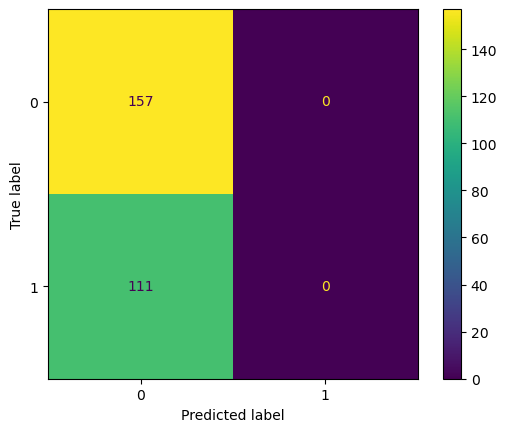

In [67]:
predictions = estimator.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
print(f'{acc=}')
ConfusionMatrixDisplay(cm).plot()

In [68]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

Pclass
 - 3 : true =  34 	pred =  0
 - 2 : true =  24 	pred =  0
 - 1 : true =  53 	pred =  0
SibSp
 - 1 : true =  39 	pred =  0
 - 0 : true =  68 	pred =  0
 - 2 : true =  4 	pred =  0
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
Parch
 - 1 : true =  18 	pred =  0
 - 0 : true =  78 	pred =  0
 - 2 : true =  14 	pred =  0
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
 - 5 : true =  1 	pred =  0
Age_true
 - 0 : true =  20 	pred =  0
 - 1 : true =  91 	pred =  0
AgeGroup
 - 0 : true =  11 	pred =  0
 - 3 : true =  27 	pred =  0
 - 2 : true =  26 	pred =  0
 - 1 : true =  7 	pred =  0
 - 4 : true =  30 	pred =  0
 - 5 : true =  10 	pred =  0
FareGroup
 - 2 : true =  18 	pred =  0
 - 1 : true =  14 	pred =  0
 - 3 : true =  32 	pred =  0
 - 4 : true =  24 	pred =  0
 - 0 : true =  9 	pred =  0
 - 5 : true =  14 	pred =  0
CabinLvl
 - 0 : true =  65 	pred =  0
 - 4 : true =  12 	pred =  0
 - 5 : true =  12 	pred =  0
 - 7 : true =  3 	pred =  0
 - 6 : true =  11 	pred =